## Code:
#### For experimenting K- Nearest classifier we will work with iris data set. 
#### Iris dataset consists of 4 features (sepal_length,sepal_width,petal_length,petal_width) to identify the species of a flower.
#### These three classes are: 'setosa', 'versicolor', 'virginica'


In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import neighbors
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('iris.csv')
type(data)

pandas.core.frame.DataFrame

In [3]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.info() # information about each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


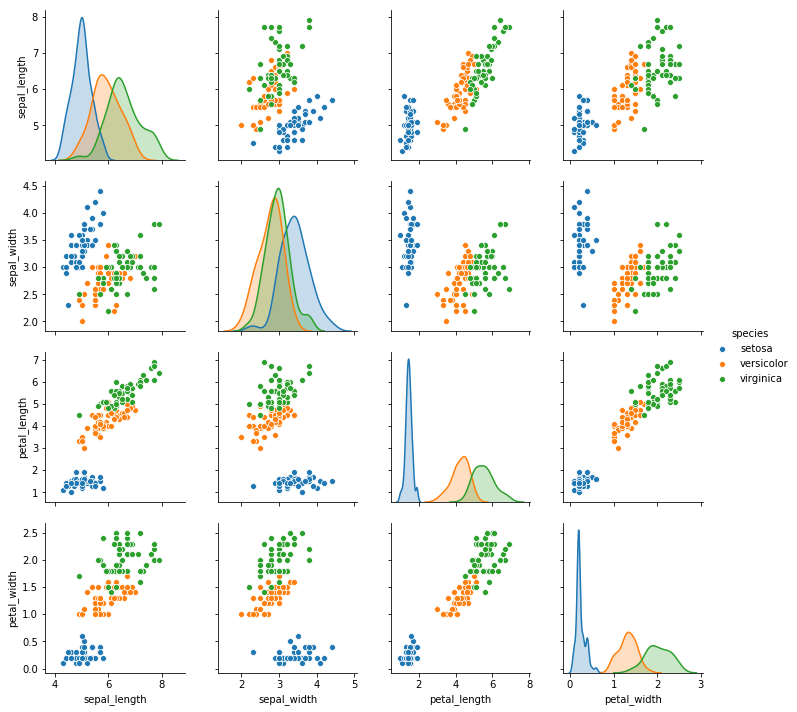

In [6]:
sns.pairplot(data, hue="species");

In [7]:
data.groupby('species').size() # it shows the number of records for each species.

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [9]:
x=data.drop(['species'],axis=1)
x.shape #row and column

(150, 4)

In [10]:
y=data['species']
y.shape

(150,)

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
y_train.head()

137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
Name: species, dtype: object

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [13]:
# Instantiate learning model (k = 3)
clf=neighbors.KNeighborsClassifier(n_neighbors=3)


In [14]:
# Fitting the model
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
# Predicting the Test set results
yhat=clf.predict(x_test)

In [16]:
y_test.shape

(30,)

In [17]:
print(confusion_matrix(y_test,yhat))


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [18]:
accuracy = accuracy_score(y_test, yhat)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [19]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

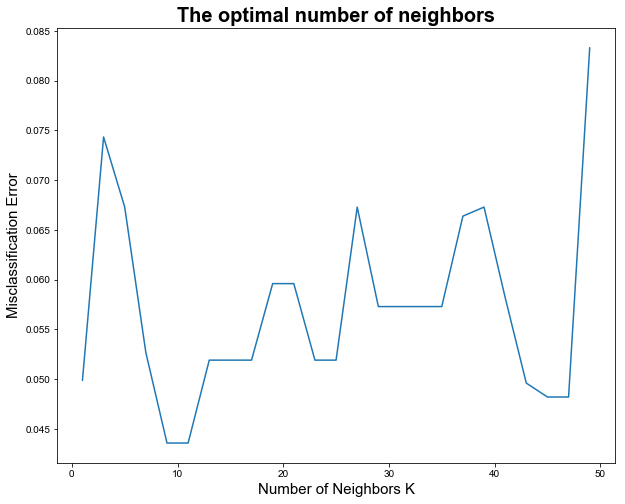

In [20]:
MSE = [1 - x for x in cv_scores]

plt.figure
plt.figure(figsize=(10,8))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [21]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
